In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
warnings.filterwarnings( "ignore")
## Importing the necessary libraries along with the standard import
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [2]:
import nltk
import os
import nltk
nltk.download("punkt")
nltk.download('inaugural')
from nltk.corpus import inaugural



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [31]:
speech_1= inaugural.raw('1941-Roosevelt.txt')
speech_2=inaugural.raw('1961-Kennedy.txt')
speech_3=inaugural.raw('1973-Nixon.txt')

### Number of Words in the Speeches:

In [21]:
print ("Number of Words in the speech of 1941-Roosevelt: " , len(inaugural.words('1941-Roosevelt.txt')))
print ("Number of Words in the speech of 1961-Kennedy: " , len(inaugural.words('1961-Kennedy.txt')))
print ("Number of Words in the speech of 1973-Nixon: " , len(inaugural.words('1973-Nixon.txt')))

Number of Words in the speech of 1941-Roosevelt:  1536
Number of Words in the speech of 1961-Kennedy:  1546
Number of Words in the speech of 1973-Nixon:  2028


### Number of Sentences in the Speeches:

In [47]:
print ("Number of SENTENCES in the speech of 1941-Roosevelt: " ,len (inaugural.sents('1941-Roosevelt.txt')))
print ("Number of SENTENCES in the speech of 1961-Kennedy: " , len(inaugural.sents('1961-Kennedy.txt')))
print ("Number of SENTENCES in the speech of 1973-Nixon: " , len(inaugural.sents('1973-Nixon.txt')))

Number of SENTENCES in the speech of 1941-Roosevelt:  68
Number of SENTENCES in the speech of 1961-Kennedy:  52
Number of SENTENCES in the speech of 1973-Nixon:  69


### Number of Charecters in the speech:

In [48]:
print ("Number of Charecters in the speech of 1941-Roosevelt: " ,len (inaugural.raw('1941-Roosevelt.txt')))
print ("Number of Charecters in the speech of 1961-Kennedy: " , len(inaugural.raw('1961-Kennedy.txt')))
print ("Number of Charecters in the speech of 1973-Nixon: " , len(inaugural.raw('1973-Nixon.txt')))


Number of Charecters in the speech of 1941-Roosevelt:  7571
Number of Charecters in the speech of 1961-Kennedy:  7618
Number of Charecters in the speech of 1973-Nixon:  9991


In [32]:
from nltk.tokenize import word_tokenize
tokenized_word_1=word_tokenize(speech_1)
tokenized_word_2=word_tokenize(speech_2)
tokenized_word_3=word_tokenize(speech_3)


In [33]:
# Converting all the words to lower casse
tokenized_word_1 = (x.lower() for x in tokenized_word_1)
tokenized_word_2 = (x.lower() for x in tokenized_word_2)
tokenized_word_3 = (x.lower() for x in tokenized_word_3)


In [34]:
from nltk.corpus import stopwords
CustomListofWordstoExclude = ["--","'s","us"] 
stop_words=set(stopwords.words("english")+list(string.punctuation))
new_stopwords_list = stop_words.union(CustomListofWordstoExclude)
print(stop_words)

{'while', 'the', 'at', 'what', 'your', 'they', 'she', 'doing', 'few', '!', 'been', 'where', '?', 'has', "don't", 'herself', 'our', '#', 'some', "hasn't", 'again', '|', 'having', 'is', 'out', 't', ';', 'until', 'over', 's', 've', 'mustn', 'into', 'am', "shan't", 'haven', '[', 'you', 'can', "mustn't", 'ain', 'them', "you've", 'very', 'was', 'all', 'does', 'why', 'wasn', 'not', "shouldn't", "isn't", 'were', "you'll", "haven't", 'don', "hadn't", '"', 'shan', 'own', '=', 'these', 'isn', "doesn't", "wouldn't", 'more', 'against', 'y', 'up', "it's", '*', '\\', 'my', 'himself', 'itself', 'too', 'by', 'before', 'under', 'hasn', 'needn', 'theirs', "'", 'we', 'after', 'as', 'or', ':', 'i', 'have', 'below', '$', 'ours', "she's", 'of', 'yours', "should've", 'its', 'her', ')', 'to', 'now', 're', 'between', 'couldn', 'which', 'it', "wasn't", 'should', '{', 'those', 'won', '.', '/', 'o', 'did', 'how', 'any', "aren't", "you'd", 'had', 'no', 'weren', 'through', 'yourself', 'him', 'whom', 'down', 'both', 

In [35]:
filtered_sent_1=[]
for w in tokenized_word_1:
    if w not in new_stopwords_list:
        filtered_sent_1.append(w)

In [36]:
filtered_sent_2=[]
for w in tokenized_word_2:
    if w not in new_stopwords_list:
        filtered_sent_2.append(w)

In [37]:
filtered_sent_3=[]
for w in tokenized_word_3:
    if w not in new_stopwords_list:
        filtered_sent_3.append(w)

In [38]:
from nltk.probability import FreqDist
fdist1 = nltk.FreqDist(filtered_sent_1)
fdist2 = nltk.FreqDist(filtered_sent_2)
fdist3 = nltk.FreqDist(filtered_sent_3)

In [39]:
# Extracting the  most common 200 words after the list of words have been converted to lowercase and the stopwords 
word_features_speech1 = [item[0] for item in fdist1.most_common(200)]
word_features_speech2 = [item[0] for item in fdist2.most_common(200)]
word_features_speech3 = [item[0] for item in fdist3.most_common(200)]

In [ ]:
speech_1= inaugural.raw('1941-Roosevelt.txt')
speech_2=inaugural.raw('1961-Kennedy.txt')
speech_3=inaugural.raw('1973-Nixon.txt')

In [58]:
print (" THE TOP THREE MOST COMMONLY USED WORDS IN THE 1941-Roosevelt SPEECH ARE : " ,fdist1.most_common(3))

 THE TOP THREE MOST COMMONLY USED WORDS IN THE 1941-Roosevelt SPEECH ARE :  [('nation', 12), ('know', 10), ('spirit', 9)]


In [59]:
print (" THE TOP THREE MOST COMMONLY USED WORDS IN THE 1961-Kennedy SPEECH ARE : " ,fdist2.most_common(3))

 THE TOP THREE MOST COMMONLY USED WORDS IN THE 1961-Kennedy SPEECH ARE :  [('let', 16), ('world', 8), ('sides', 8)]


In [60]:
print (" THE TOP THREE MOST COMMONLY USED WORDS IN THE 1973-Nixont SPEECH ARE : " ,fdist3.most_common(3))

 THE TOP THREE MOST COMMONLY USED WORDS IN THE 1973-Nixont SPEECH ARE :  [('let', 22), ('america', 21), ('peace', 19)]


[('let', 16), ('world', 8), ('sides', 8)]

In [56]:
fdist3.most_common(3)

[('let', 22), ('america', 21), ('peace', 19)]

In [49]:
word_features_speech1[0:3]

['nation', 'know', 'spirit']

In [50]:
word_features_speech2[0:3]

['let', 'world', 'sides']

In [51]:
word_features_speech3[0:3]

['let', 'america', 'peace']

In [43]:
# Word Cloud 
from wordcloud import WordCloud

Word Cloud for the 1941-Roosevelt speech (after cleaning)!!


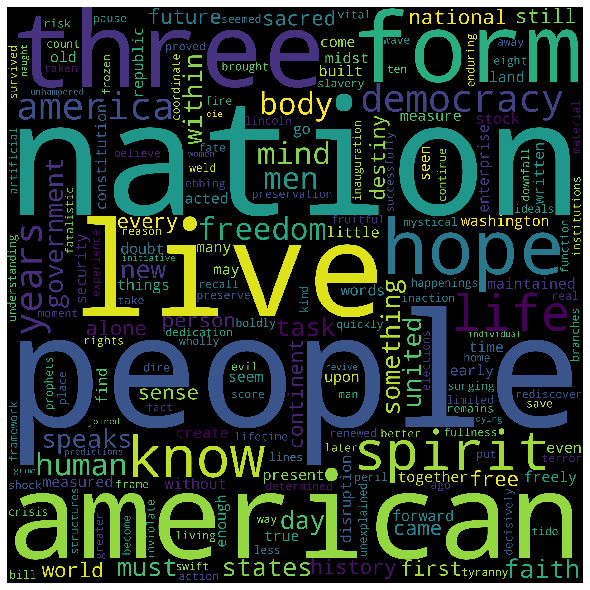

In [61]:
wc_a = ' '.join(word_features_speech1)
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for the 1941-Roosevelt speech (after cleaning)!!")
plt.show()



Word Cloud for the 1961-Kennedy speech (after cleaning)!!


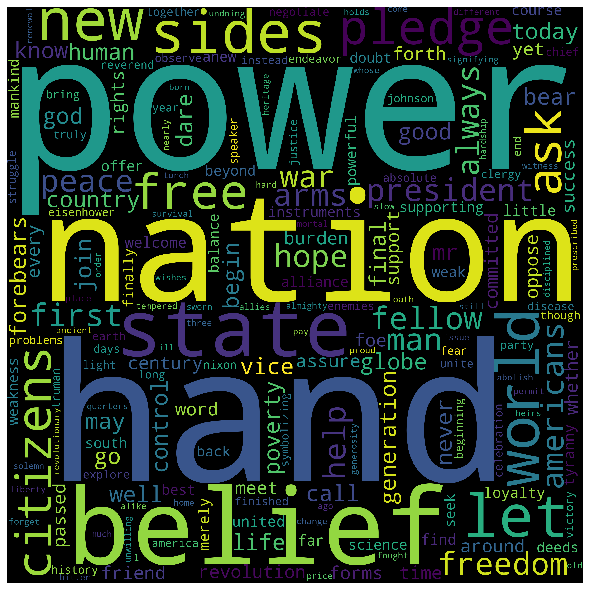

In [62]:
wc_a = ' '.join(word_features_speech2)
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for the 1961-Kennedy speech (after cleaning)!!")
plt.show()

Word Cloud for the 1973-Nixont speech (after cleaning)!!


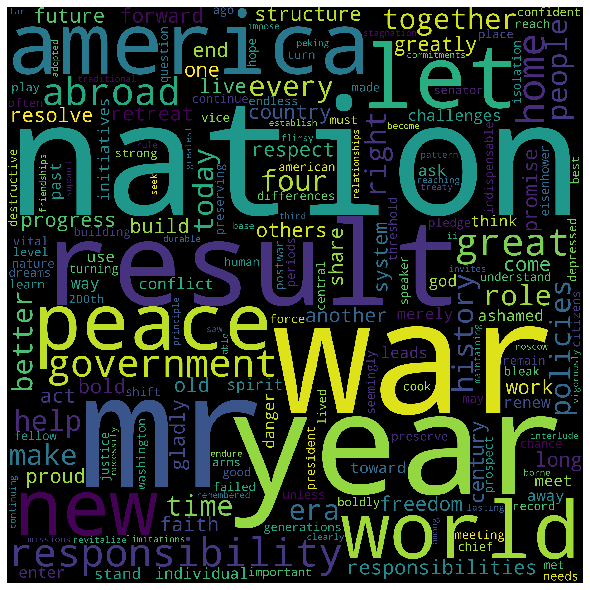

In [63]:
wc_a = ' '.join(word_features_speech3)
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for the 1973-Nixont speech (after cleaning)!!")
plt.show()